# Think Bayes: Chapter 3

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [6]:
cd ../code/

/Users/martin/Documents/bitbucket/thinkbayes/code


In [7]:
from __future__ import print_function, division, xrange

% matplotlib inline

import thinkplot
from thinkbayes2 import Hist, Pmf, Suite, Cdf

## The Dice problem

Suppose I have a box of dice that contains a 4-sided die, a 6-sided
die, an 8-sided die, a 12-sided die, and a 20-sided die.

Suppose I select a die from the box at random, roll it, and get a 6.
What is the probability that I rolled each die?

The `Dice` class inherits `Update` and provides `Likelihood`

In [8]:
class Dice(Suite):
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1/hypo

Here's what the update looks like:

In [9]:
suite = Dice([4, 6, 8, 12, 20])

In [10]:
suite.Update(6)
suite.Print()

4 0.0
6 0.3921568627450981
8 0.29411764705882354
12 0.19607843137254904
20 0.11764705882352944


And here's what it looks like after more data:

In [11]:
for roll in [6, 8, 7, 7, 5, 4]:
    suite.Update(roll)
    suite.Print()    


4 0.0
6 0.5256241787122208
8 0.2956636005256242
12 0.1314060446780552
20 0.047306176084099885
4 0.0
6 0.0
8 0.7351339577434111
12 0.2178174689610107
20 0.04704857329557832
4 0.0
6 0.0
8 0.817574005587765
12 0.16149609986918817
20 0.020929894543046793
4 0.0
6 0.0
8 0.8757125344951456
12 0.11532016915162413
20 0.008967296353230295
4 0.0
6 0.0
8 0.9158452719690099
12 0.08040342579700499
20 0.0037513022339850668
4 0.0
6 0.0
8 0.9432484536722124
12 0.0552061280612909
20 0.001545418266496554


## The train problem

“A railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has.” <i>Fifty Challenging Problems in Probability with Solutions </i> (Dover, 1987)

The Train problem has the same likelihood as the Dice problem.

In [12]:
class Train(Suite):
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1/hypo

But there are many more hypotheses

In [14]:
hypos = range(1, 1001)
suite = Train(hypos)
suite.Update(60)

0.0028222671142652746

Here's what the posterior looks like

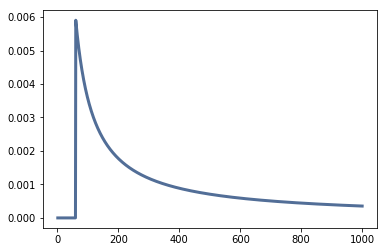

In [15]:
thinkplot.Pdf(suite)

And here's how we can compute the posterior mean

In [16]:
def Mean(suite):
    total = 0
    for hypo, prob in suite.Items():
        total += hypo * prob
    return total

Mean(suite)

333.41989326371095

Or we can just use the method

In [17]:
suite.Mean()

333.41989326371095

## Sensitivity to the prior

Here's a function that solves the train problem for different priors and data

In [18]:
def MakePosterior(high, dataset, constructor=Train):
    """Solves the train problem.
    
    high: int maximum number of trains
    dataset: sequence of observed train numbers
    constructor: function used to construct the Train object
    
    returns: Train object representing the posterior suite
    """
    hypos = range(1, high+1)
    suite = constructor(hypos)

    for data in dataset:
        suite.Update(data)

    return suite

Let's run it with the same dataset and several uniform priors

In [19]:
dataset = [30, 60, 90]

for high in [500, 1000, 2000]:
    suite = MakePosterior(high, dataset)
    print(high, suite.Mean())

500 151.84958795903822
1000 164.30558642273363
2000 171.33818109150937


The results are quite sensitive to the prior, even with several observations.

## Power law prior

Now let's try it with a power law prior.

In [20]:
class Train2(Train):

    def __init__(self, hypos, alpha=1.0):
        Pmf.__init__(self)
        for hypo in hypos:
            self[hypo] = hypo**(-alpha)
        self.Normalize()

Here's what a power law prior looks like, compared to a uniform prior

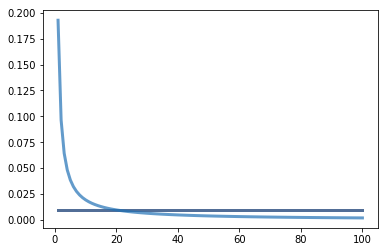

In [24]:
high = 100
hypos = range(1, high+1)
suite1 = Train(hypos)
suite2 = Train2(hypos)
thinkplot.Pdf(suite1)
thinkplot.Pdf(suite2)


Now let's see what the posteriors look like after observing one train.

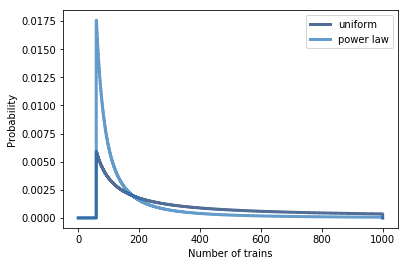

In [25]:
dataset = [60]
high = 1000

thinkplot.PrePlot(num=2)

constructors = [Train, Train2]
labels = ['uniform', 'power law']

for constructor, label in zip(constructors, labels):
    suite = MakePosterior(high, dataset, constructor)
    suite.label = label
    thinkplot.Pmf(suite)

thinkplot.Config(xlabel='Number of trains',
                 ylabel='Probability')

The power law gives less prior probability to high values, which yields lower posterior means, and less sensitivity to the upper bound.

In [33]:
dataset = [30, 60, 90]

for high in [500, 1000, 2000]:
    suite = MakePosterior(high, dataset, Train2)
    print(high, suite.Mean(), suite.Percentile(5), suite.Percentile(95))

500 130.70846986256004 91 235
1000 133.2752313750312 91 242
2000 133.99746308073065 91 243


## Credible intervals

To compute credible intervals, we can use the `Percentile` method on the posterior.

In [27]:
help(suite.Percentile)

Help on method Percentile in module thinkbayes2:

Percentile(percentage) method of __main__.Train2 instance
    Computes a percentile of a given Pmf.
    
    Note: this is not super efficient.  If you are planning
    to compute more than a few percentiles, compute the Cdf.
    
    percentage: float 0-100
    
    returns: value from the Pmf



In [36]:
hypos = range(1, 1001)
suite = Train(hypos)
suite.Update(60)

suite.Percentile(5), suite.Percentile(95)

(69, 869)

In [32]:
hypos = range(1, 1001)
suite = Train2(hypos)
suite.Update(3)

suite.Percentile(5), suite.Percentile(95)

(3, 48)

If you have to compute more than a few percentiles, it is more efficient to compute a CDF.

Also, a CDF can be a better way to visualize distributions.

In [34]:
help(Cdf)

Help on class Cdf in module thinkbayes2:

class Cdf(builtins.object)
 |  Represents a cumulative distribution function.
 |  
 |  Attributes:
 |      xs: sequence of values
 |      ps: sequence of probabilities
 |      label: string used as a graph label.
 |  
 |  Methods defined here:
 |  
 |  ConfidenceInterval = CredibleInterval(self, percentage=90)
 |  
 |  Copy(self, label=None)
 |      Returns a copy of this Cdf.
 |      
 |      label: string label for the new Cdf
 |  
 |  CredibleInterval(self, percentage=90)
 |      Computes the central credible interval.
 |      
 |      If percentage=90, computes the 90% CI.
 |      
 |      Args:
 |          percentage: float between 0 and 100
 |      
 |      Returns:
 |          sequence of two floats, low and high
 |  
 |  Items(self)
 |      Returns a sorted sequence of (value, probability) pairs.
 |      
 |      Note: in Python3, returns an iterator.
 |  
 |  MakePmf(self, label=None)
 |      Makes a Pmf.
 |  
 |  Max(self, k)
 |      

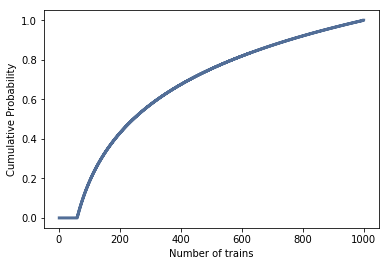

In [37]:
cdf = Cdf(suite)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Number of trains',
                 ylabel='Cumulative Probability',
                 legend=False)

`Cdf` also provides `Percentile`

In [38]:
cdf.Percentile(5), cdf.Percentile(95)

(69, 869)

## Exercises

**Exercise:** To write a likelihood function for the locomotive problem, we had
to answer this question:  "If the railroad has `N` locomotives, what
is the probability that we see number 60?"

The answer depends on what sampling process we use when we observe the
locomotive.  In this chapter, I resolved the ambiguity by specifying
that there is only one train-operating company (or only one that we
care about).

But suppose instead that there are many companies with different
numbers of trains.  And suppose that you are equally likely to see any
train operated by any company.
In that case, the likelihood function is different because you
are more likely to see a train operated by a large company.

As an exercise, implement the likelihood function for this variation
of the locomotive problem, and compare the results.

**Exercise:** Suppose I capture and tag 10 rock hyraxes.  Some time later, I capture another 10 hyraxes and find that two of them are already tagged.  How many hyraxes are there in this environment?

As always with problems like this, we have to make some modeling assumptions. 

1) For simplicity, you can assume that the environment is reasonably isolated, so the number of hyraxes does not change between observations.

2) And you can assume that each hyrax is equally likely to be captured during each phase of the experiment, regardless of whether it has been tagged.  In reality, it is possible that tagged animals would avoid traps in the future, or possible that the same behavior that got them caught the first time makes them more likely to be caught again.  But let's start simple.

I suggest the following notation:

*  `N`: total population of hyraxes 
*  `K`: number of hyraxes tagged in the first round 
*  `n`: number of hyraxes caught in the second round
*  `k`: number of hyraxes in the second round that had been tagged

So `N` is the hypothesis and `(K, n, k)` make up the data.  The probability of the data, given the hypothesis, is the probability of finding `k` tagged hyraxes out of `n` if (in the population) `K` out of `N` are tagged. 

If you are familiar with the hypergeometric distribution, you can use the hypergeometric PMF to compute the likelihood function.  Otherwise, you can figure it out using combinatorics.

In [39]:
# Solution goes here
from scipy.special import binom

In [45]:
help(binom)

Help on ufunc object:

binom = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate array

In [40]:
class Hyrax(Suite):
    """Represents hypotheses about how many hyraxes there are."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: total population (N)
        data: # tagged (K), # caught (n), # of caught who were tagged (k)
        """
        N = hypo
        K, n, k = data

        if hypo < K + (n - k):
            return 0

        like = binom(N-K, n-k) / binom(N, n)
        return like

In [41]:
# Solution goes here
hypos = range(1, 1000)
suite = Hyrax(hypos)

data = 10, 10, 2
suite.Update(data)

0.0010248876709531896

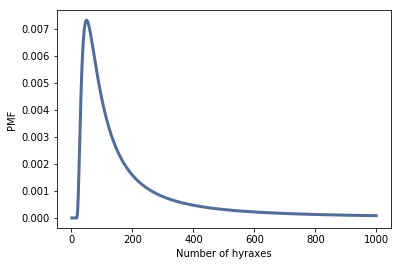

In [42]:
# Solution goes here

thinkplot.Pdf(suite)
thinkplot.Config(xlabel='Number of hyraxes', ylabel='PMF', legend=False)

In [46]:
# Solution goes here
print('Posterior mean', suite.Mean())
print('Maximum a posteriori estimate', suite.MaximumLikelihood())
print('90% credible interval', suite.CredibleInterval(90))

Posterior mean 185.57095794814575
Maximum a posteriori estimate 50
90% credible interval (36, 618)


In [24]:
# Solution goes here

In [25]:
# Solution goes here

In [26]:
# Solution goes here